# **Análisis exploratorio de los datos**
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

### **1. Cargar archivos de entrenamiento**

In [2]:
# Cargar los arrays desde los archivos .npy
X_train = np.load('X_data.npy')
y_train = np.load('y_data.npy')

print("Imágenes y etiquetas cargadas desde archivos .npy")

Imágenes y etiquetas cargadas desde archivos .npy


### **2. Explorar datos**

Número de clases: 131
Número de imágenes: 67692
Distribución de clases:
Grape Blue            984
Plum 3                900
Peach 2               738
Strawberry Wedge      738
Tomato 1              738
Melon Piel de Sapo    738
Tomato 3              738
Cherry Rainier        738
Cherry 2              738
Walnut                735
Name: label, dtype: int64


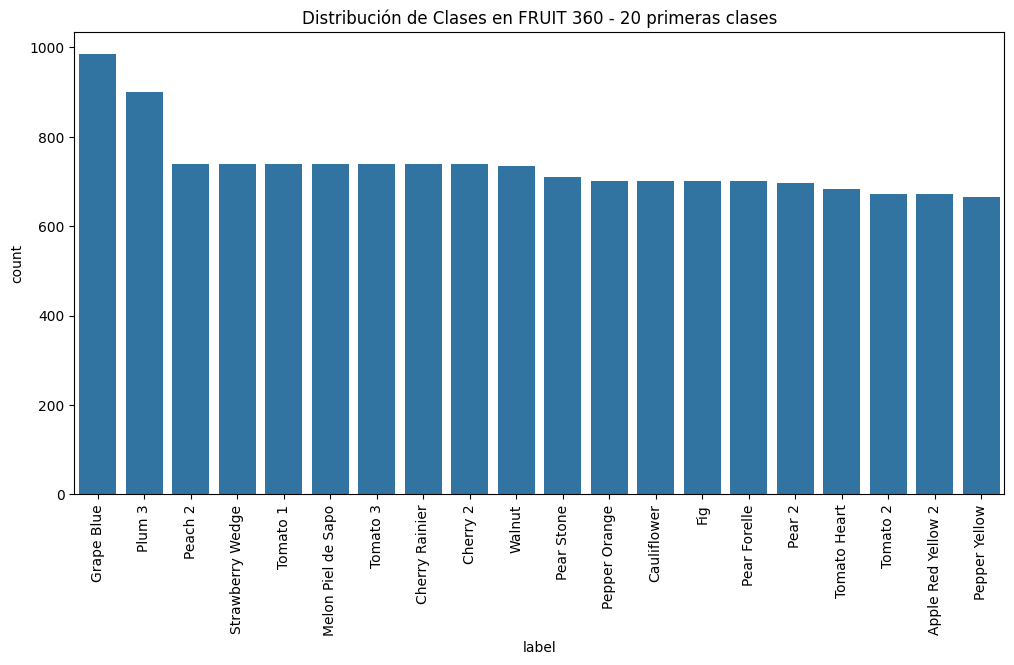

In [3]:
# Convertir las etiquetas a un DataFrame para facilitar el análisis
labels_df = pd.DataFrame(y_train, columns=['label'])

# Imprimir información básica del dataset
print("Número de clases:", len(np.unique(y_train)))
print("Número de imágenes:", len(X_train))
print("Distribución de clases:")
print(labels_df['label'].value_counts()[:10])

# Visualizar la distribución de clases
plt.figure(figsize=(12, 6))
sns.countplot(x='label', data=labels_df, order=labels_df['label'].value_counts()[:20].index)
plt.xticks(rotation=90)
plt.title('Distribución de Clases en FRUIT 360 - 20 primeras clases')
plt.show()

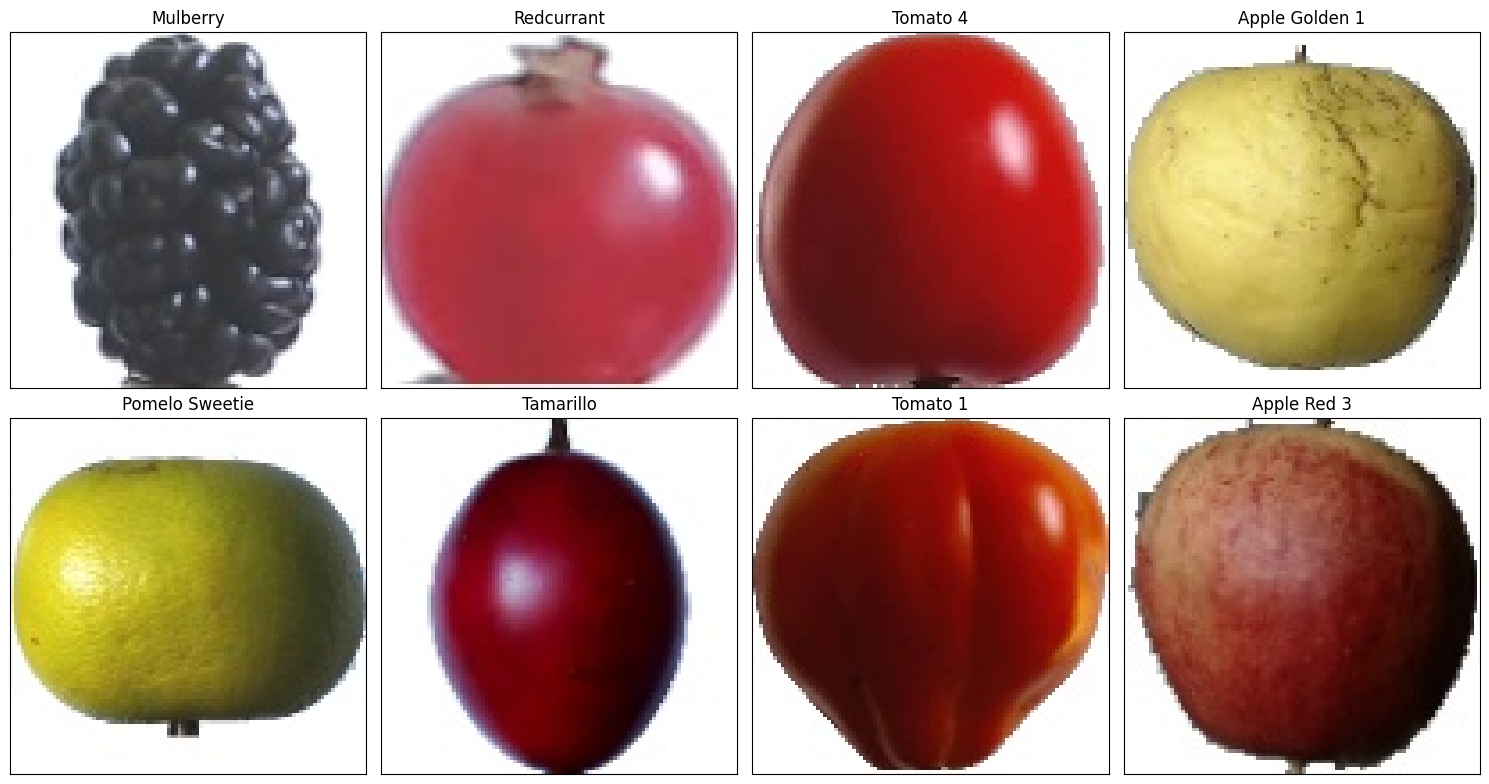

<Figure size 640x480 with 0 Axes>

In [42]:
N_ROWS = 2
N_COLS = 4

random_labels = np.random.choice(labels_df["label"].unique(), N_ROWS*N_COLS, replace=False)

plt.figure(figsize=(15,8))
for row in range(N_ROWS):
    
    for col in range(N_COLS):
        
        idx = row*N_COLS + col
        
        mask = [y_train == random_labels[idx]]
        
        label = y_train[mask[0]][0]
        img = X_train[mask[0]][0] 
        
        ax = plt.subplot(N_ROWS, N_COLS, idx+1)
        ax.set_title(label)
        plt.imshow(img) 
        plt.xticks([])
        plt.yticks([])

plt.tight_layout()
plt.show()
plt.savefig("Fruits_360")

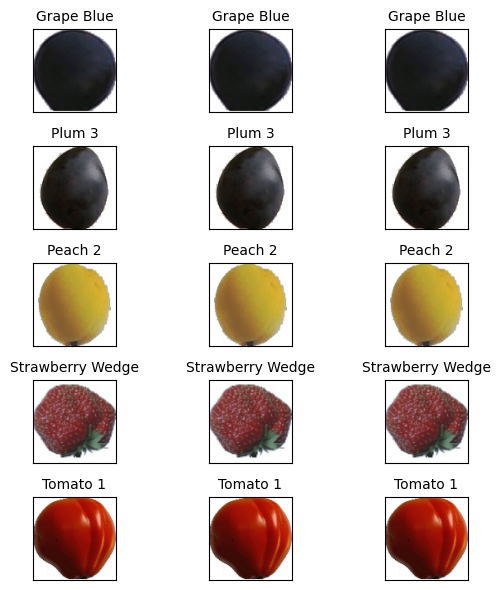

In [92]:
labels = ["Grape Blue", "Plum 3", "Peach 2", "Strawberry Wedge", "Tomato 1"]

n_images = 3
n_rows = len(labels)

plt.figure(figsize=(6,6))
for i, label in enumerate(labels):
    target_label_df = labels_df[labels_df["label"] == label]
    for j in range(n_images):
        image = X_train[target_label_df.index[i]]
        
        plt.subplot(n_rows, n_images, n_images*i + j + 1)
        plt.imshow(image)
        plt.xticks([])
        plt.yticks([])
        plt.title(label, fontdict={"fontsize": 10})
        
plt.tight_layout()
plt.show()